# 土豪结婚之估数字

>某天一个土豪新郎结婚。土豪就是土豪，你不知道新郎会请几辆礼车，但你知道那些礼车是从 1 到 n 标号的。你打开窗户，看到了第 60 号礼车。请问，这位土豪最有可能请了多少辆礼车？

![土豪结婚](public/img/car_60.png){fig-alt="土豪结婚"}

我们可以把这个问题和「骰子」问题联系起来。你可以这么想：有从 1 到 n 个骰子，1 号骰子有 1 面，2 号骰子有 2 面，n 号有 n 面。随机抽了一颗骰子，随手一抛，看到数字 60。请问这颗骰子最有可能是哪一颗？

- hypothesis: 哪颗骰子
- data: 随机抽了一颗骰子，随手一抛，看到数字 60
- prior: $p(h)$
- likelihood: $p(d|h)$
- posterior: $p(h|d)$

具体到 prior，我们假设有 1000 辆车，概率我们用 uniform probabilities。

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [24]:
def normalize_array(arr):
    return np.array([i/sum(arr) for i in arr])

In [25]:
n = 1000
prior = np.array([1]*n)
prior = normalize_array(prior)

In [26]:
def update_posterior(n, prior, data):
    '''to upate posterior in this example 
    prior: empiricaldist.Pmf object 
    data: e.g., 60
    '''
    # likelihood is 1/hypos because, say num 60 is only 1/100 chance in dice #100
    hypos = np.arange(1, n+1)
    likelihood = 1 / hypos 
    # dice #1 to dice #data are impossible
    likelihood[data > hypos] = 0 
    posterior = prior.copy()
    posterior *= likelihood 
    return normalize_array(posterior)

In [27]:
posterior = update_posterior(n, prior, data = 60)

In [28]:
#| code-fold: true
def draw_posterior(posterior, xlabel, c, legend_text, s=4):
    """
    posterior: posterior, a empiricaldist.Pmf object
    xlabel: xlabel you want to see in the plot 
    c: color of the dots 
    legend_text: text for the legend
    s: size of the dots
    """
    df = pd.DataFrame(posterior, columns=['probs'])
    df = df.reset_index(names = xlabel)
    df.plot.scatter(
        x = xlabel,
        y = 'probs',
        color = c, 
        s = s,
        label = legend_text
    )
    plt.ylabel("Probability mass function")
    plt.legend()
    plt.title("Posterior distribution")
    plt.show()

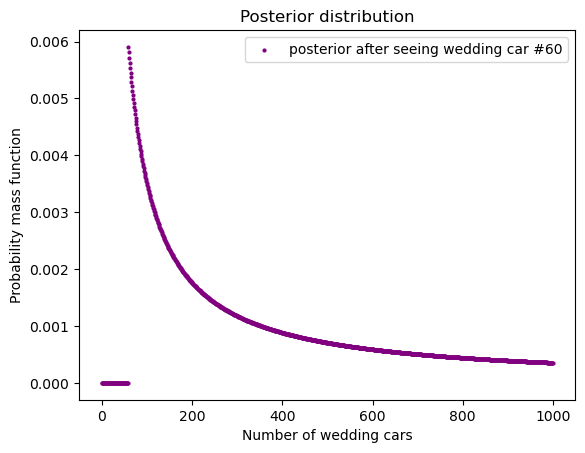

In [29]:
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after seeing wedding car #60")

In [30]:
max_index = np.argmax(posterior)
print("最高点出现在 Wedding car #", max_index + 1)

最高点出现在 Wedding car # 60


## 不同 prior 

我们试一下用随机的 prior。

In [31]:
random_prior_values = np.random.rand(n)
random_prior = normalize_array(random_prior_values)
posterior = update_posterior(n, random_prior, data = 60)

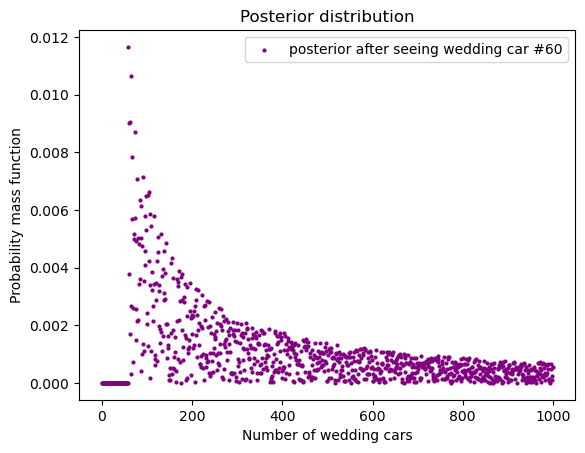

In [32]:
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after seeing wedding car #60")

我们看到，结果不太一样。这说明，我们的数据不够，因此不同的 prior 导致 posterior 不同。

## 更多数据

假如我们有更多的数据，比如，我们知道不仅有 60 号车，我们还看到了 30 号和 90 号车。这就和我们第一次随机抽了一颗骰子，随机抛掷，见了 60。然后再次随机抛掷，30。再次随机抛掷，见了 90。这个问题和「一百零一只碗」类似。每次抛掷，我们重新计算 posterior。第二次的 prior 就是第一次的 posterior，但是 likelihood 每次有肯能不一样。

假设 prior 不变的话，根据新数据计算出来的 posterior：


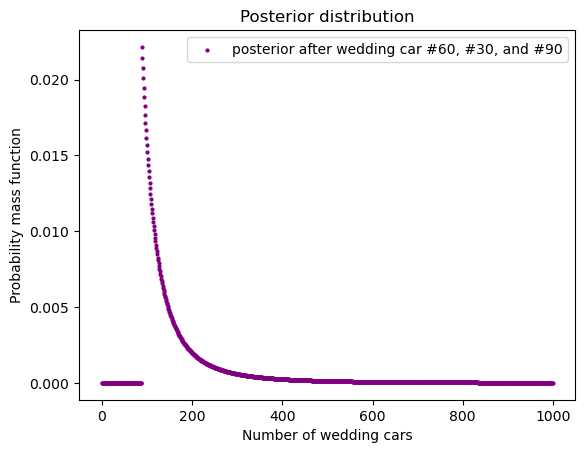

In [33]:
dataset = [60, 30,90]
posterior = prior.copy()
for data in dataset:
    posterior = update_posterior(n, posterior, data=data)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60, #30, and #90")

我们可以检测一下，再把 prior 改为随机的，看看结果如何：

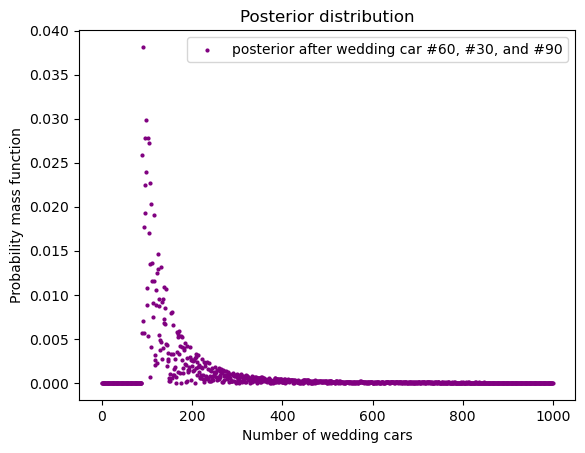

In [34]:
dataset = [60, 30,90]
posterior = random_prior.copy()
for data in dataset:
    posterior = update_posterior(n, posterior, data=data)
draw_posterior(
    posterior, 'Number of wedding cars', 
    c = 'purple', legend_text="posterior after wedding car #60, #30, and #90")

我们看到，比上次只有一个数据点 (60) 的时候好一点，和 uniform prior 的结果更为接近。